In [14]:
# Imports
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_ta as ta

### Data Retreival/Formatting ###

In [15]:
# Pull data

aapl_df = yf.download('AAPL', start='2022-01-01',interval='1h')[['Open','High','Low','Volume','Close']]
aapl_df.index.name = 'timestamp'

aapl_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Volume,Close
timestamp,,,,,
2022-01-03 09:30:00,177.830002,181.429993,177.710007,25170269,180.839996
2022-01-03 10:30:00,180.850006,181.770004,180.389999,11976542,181.749893
2022-01-03 11:30:00,181.750000,181.770004,181.074997,8143152,181.600006
2022-01-03 12:30:00,181.595001,182.279007,181.490005,8407914,182.229706
2022-01-03 13:30:00,182.225006,182.880005,181.809998,11618629,181.865005
...,...,...,...,...,...
2023-01-17 11:30:00,135.389999,136.139999,135.309998,5683922,135.589996
2023-01-17 12:30:00,135.589996,136.309998,135.559998,5066835,136.050003
2023-01-17 13:30:00,136.059998,136.399994,135.399994,4414004,135.660599


In [16]:
# Inspect dataframe

aapl_df.dtypes

Open      float64
High      float64
Low       float64
Volume      int64
Close     float64
dtype: object

In [17]:
# We make a copy of aapl_df so you don't have to re-download it if you mess it up.
aapl_df_play = aapl_df.copy()

In [23]:
# # Shift data to predict price 1 hours in the future - NOT NEEDED FOR NOW
# aapl_df_play[['Open', 'High','Low','Volume','Close']]=aapl_df_play[['Open', 'High','Low','Volume','Close']].shift(1)
# display(aapl_df_play.head())

# # Drop rows w/ empty values
# aapl_df_play = aapl_df_play.dropna()
display(aapl_df_play.head())

,Open,High,Low,Volume,Close
timestamp,,,,,
2022-01-03 09:30:00,177.830002,181.429993,177.710007,25170269,180.839996
2022-01-03 10:30:00,180.850006,181.770004,180.389999,11976542,181.749893
2022-01-03 11:30:00,181.750000,181.770004,181.074997,8143152,181.600006
2022-01-03 12:30:00,181.595001,182.279007,181.490005,8407914,182.229706
2022-01-03 13:30:00,182.225006,182.880005,181.809998,11618629,181.865005


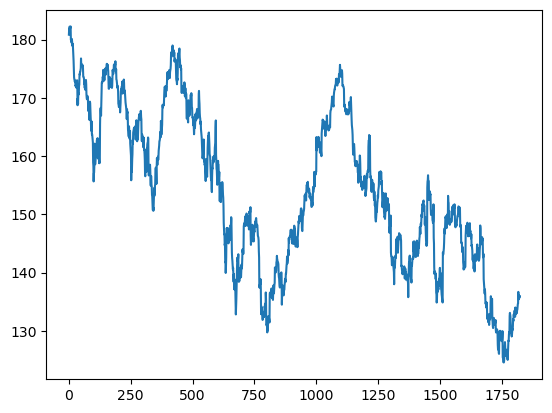

In [19]:
# Plot the data
plt.plot(range(len(aapl_df_play)), aapl_df_play[['Close']])

In [28]:
# Generate Mac/D indicator
macd_df = aapl_df_play.ta.macd()

print(macd_df.tail())

                     MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9
timestamp                                                      
2023-01-17 11:30:00      1.173273       0.118081       1.055193
2023-01-17 12:30:00      1.208036       0.122275       1.085761
2023-01-17 13:30:00      1.190442       0.083745       1.106698
2023-01-17 14:30:00      1.166633       0.047949       1.118685
2023-01-17 15:30:00      1.153431       0.027797       1.125634


In [27]:
# Testing 
macd_df2 = ta.macd(aapl_df_play['Close'])
print(macd_df2.tail())

# help(ta.macd)

                     MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9
timestamp                                                      
2023-01-17 11:30:00      1.173273       0.118081       1.055193
2023-01-17 12:30:00      1.208036       0.122275       1.085761
2023-01-17 13:30:00      1.190442       0.083745       1.106698
2023-01-17 14:30:00      1.166633       0.047949       1.118685
2023-01-17 15:30:00      1.153431       0.027797       1.125634


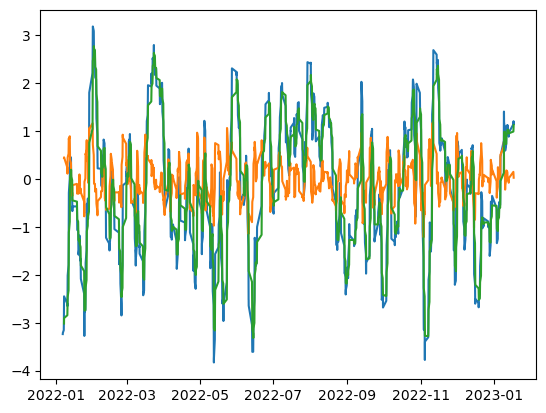

In [29]:
plt.plot(macd_df)

In [30]:
# Create VWAP DF
vwap_df = aapl_df_play.ta.vwap()
print(vwap_df.tail())

timestamp
2023-01-17 11:30:00    135.867352
2023-01-17 12:30:00    135.880654
2023-01-17 13:30:00    135.874695
2023-01-17 14:30:00    135.866968
2023-01-17 15:30:00    135.865072
Name: VWAP_D, dtype: float64


In [32]:
# Alternate syntax to compare values - this syntax helps vscode intellisense work
vwap_df2 = ta.vwap(aapl_df_play['High'], aapl_df_play['Low'], aapl_df_play['Close'], aapl_df_play['Volume'])
print(vwap_df2.tail())

timestamp
2023-01-17 11:30:00    135.867352
2023-01-17 12:30:00    135.880654
2023-01-17 13:30:00    135.874695
2023-01-17 14:30:00    135.866968
2023-01-17 15:30:00    135.865072
Name: VWAP_D, dtype: float64


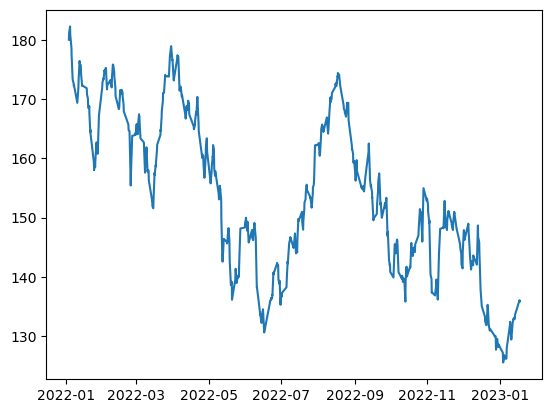

In [31]:
plt.plot(vwap_df)

In [37]:
# Create bolinger bands df
bbands_df = aapl_df_play.ta.bbands()
print(bbands_df.tail())

                      BBL_5_2.0   BBM_5_2.0   BBU_5_2.0  BBB_5_2.0  BBP_5_2.0
timestamp                                                                    
2023-01-17 11:30:00  133.890619  135.395099  136.899578   2.222354   0.564772
2023-01-17 12:30:00  134.356359  135.685001  137.013642   1.958421   0.637359
2023-01-17 13:30:00  134.959549  135.877121  136.794693   1.350591   0.382014
2023-01-17 14:30:00  135.253762  135.680121  136.106479   0.628476   0.529178
2023-01-17 15:30:00  135.438043  135.789120  136.140198   0.517092   0.714884


In [38]:
help(ta.bbands)

Help on function bbands in module pandas_ta.volatility.bbands:

bbands(close, length=None, std=None, ddof=0, mamode=None, talib=None, offset=None, **kwargs)
    Bollinger Bands (BBANDS)
    
    A popular volatility indicator by John Bollinger.
    
    Sources:
        https://www.tradingview.com/wiki/Bollinger_Bands_(BB)
    
    Calculation:
        Default Inputs:
            length=5, std=2, mamode="sma", ddof=0
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        STDEV = Standard Deviation
        stdev = STDEV(close, length, ddof)
        if "ema":
            MID = EMA(close, length)
        else:
            MID = SMA(close, length)
    
        LOWER = MID - std * stdev
        UPPER = MID + std * stdev
    
        BANDWIDTH = 100 * (UPPER - LOWER) / MID
        PERCENT = (close - LOWER) / (UPPER - LOWER)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): The short period. Default: 5
        std (int): The long 

In [46]:
# Create big_df

big_df = pd.concat([aapl_df_play, macd_df, vwap_df, bbands_df], axis=1)
big_df = big_df.dropna()
display(big_df)

,Open,High,Low,Volume,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,VWAP_D,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
timestamp,,,,,,,,,,,,,,
2022-01-07 14:30:00,172.119995,173.688095,172.059998,8653208,173.020004,-2.568892,0.446812,-3.015704,172.346823,171.441902,172.260001,173.078099,0.949842,0.964494
2022-01-07 15:30:00,173.020004,173.259995,171.899994,8297866,172.250000,-2.447220,0.454787,-2.902007,172.360356,171.683404,172.354001,173.024598,0.778162,0.422456
2022-01-10 09:30:00,170.500000,171.199997,168.369995,28425994,168.729996,-2.604802,0.237764,-2.842566,169.433329,168.658183,171.660001,174.661819,3.497400,0.011962
2022-01-10 10:30:00,168.710007,170.020004,168.169998,13370002,169.925003,-2.603252,0.191452,-2.794703,169.413605,167.985384,171.211002,174.436619,3.768002,0.300659
2022-01-10 11:30:00,169.929993,169.929993,168.289993,9475502,168.916702,-2.652804,0.113519,-2.766323,169.345587,167.062924,170.568341,174.073758,4.110279,0.264416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-17 11:30:00,135.389999,136.139999,135.309998,5683922,135.589996,1.173273,0.118081,1.055193,135.867352,133.890619,135.395099,136.899578,2.222354,0.564772
2023-01-17 12:30:00,135.589996,136.309998,135.559998,5066835,136.050003,1.208036,0.122275,1.085761,135.880654,134.356359,135.685001,137.013642,1.958421,0.637359
2023-01-17 13:30:00,136.059998,136.399994,135.399994,4414004,135.660599,1.190442,0.083745,1.106698,135.874695,134.959549,135.877121,136.794693,1.350591,0.382014
